## Plan for today:

Solve exercise 4


* Solve the engine replacement model using mathematical programming with equilibrium constraints (MPEC)

# Exercise 4: Engine Replacement Model with MPEC

Consider the engine replacement model given by:

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ u(x,d) + \varepsilon_d + \beta
\underbrace{\int_{X} \int_{\Omega} V(x',\varepsilon') \pi(x'|x,d) q(\varepsilon'|x') dx' d\varepsilon' }_{EV(x,d)} \big\}
$$

Where $ \varepsilon $ is extreme value Type I distribued and utility is given by:

$$
u(x,d)=\left \{
\begin{array}{ll}
    -RC-c(0,\theta_1) & \text{if }d=\text{replace}=1 \\
    -c(x,\theta_1) & \text{if }d=\text{keep}=0
\end{array} \right.
$$

Here

- $ RC $ = replacement cost  
- $ c(x,\theta_1)  = \theta_1 x$, cost of maintenance with preference parameters $ \theta_1 $  


Recall the NFXP algorithm:

$$\max_{RC,\theta_1}  \big\{ L\big(RC,\theta_1\big)  \big\}$$

Each time we change $RC, \theta_1$ in the maximization process, we need to solve: 

$$EV(x,d)=\Gamma (EV)=\int_{X} \int_{\Omega} V(x',\varepsilon') \pi(x'|x,d) q(\varepsilon'|x') dx' d\varepsilon' $$

So what is MPEC?

\begin{align}
    \begin{split}
    \max_{RC,\theta_1,EV} & \big\{ L\big(RC,\theta_1,EV\big)  \big\} \\
    & s.t. \\
    EV & =\Gamma(EV) \Rightarrow EV - \Gamma(EV) =0
    \end{split}
\end{align}

Where $EV=(EV(1),EV(2),...,EV(n))$.




Remember the log-likelihood constribution is simply given by the choice probability of the chosen alternative:

$$L_{it}(RC,\theta_1,EV) = \log ( P(d_{it}|x_{it})) $$

Where

$$
P(d_{it}|x_{it}) = \frac{\exp[ u(x_{it},d_{it}) + \beta EV(x_{it},d_{it})  ]}{\sum_{d_{it}\in \{0,1\}} \exp[u(x_{it},d_{it}) + \beta EV(x_{it},d_{it})]}
$$

We could simply pass the log-likelihood function to the solver and maximize it. However, it becomes infeasible if our state space is large (the EV vector is large), because the gradient and hessian will be approximated numerically.


* Why do we need the hessian and the gradiant again? We need it for the hill-climbing algorithm, i.e. the solver.

* We looked at the Newton's method (very simple hill-climbing algorithm) to solve $f(x)=0$, where $f(x)$ is the gradient.

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

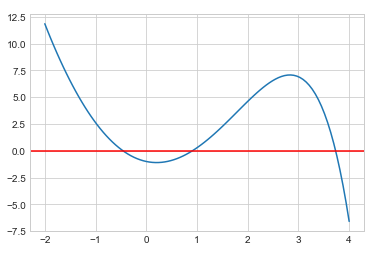

In our model, the gradient of the likelihood is not a scalar, but a vector:

\begin{align}
    \underbrace{\begin{bmatrix}
    \frac{\partial L\big(RC,\theta_1,EV\big)}{\partial RC} \\
    \frac{\partial L\big(RC,\theta_1,EV\big)}{\partial \theta_1}  \\
     \frac{\partial L\big(RC,\theta_1,EV\big)}{\partial EV(1)}  \\
     ... \\
     \frac{\partial L\big(RC,\theta_1,EV\big)}{\partial EV(n)}
    \end{bmatrix}}_{(2+n) \times 1} =0
\end{align}

Next, the hessian of the likelihood is matrix:
$$
\underbrace{\begin{bmatrix}
    \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial^2 (RC)} & \dots & \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial (RC) \partial EV(n)} \\
    \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial \theta_1 \partial (RC)} & \dots & \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial (\theta_1) \partial EV(n)}  \\
     \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial EV(1)  \partial (RC)} & \dots & \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial (EV(1)) \partial EV(n)}  \\
     \dots &  & \dots \\
     \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{\partial EV(n)  \partial (RC)} & \dots & \frac{\partial^2 L\big(RC,\theta_1,EV\big)}{ \partial^2 EV(n)}
\end{bmatrix}}_{(2+n) \times (2+n)}
$$

We also need to take into account the constraints:

$$F(RC,\theta_1,EV)=\underbrace{EV-\Gamma (EV)}_ {n \times 1}=0$$

And the derivatives of the constraints:


$$\underbrace{\frac{\partial F(RC,\theta_1,EV) }{\partial (RC,\theta_1,EV)}}_{n \times (2+n)}  $$


Now feed all these functions into the solver. Remember to take into account the sparsity patterns, i.e. that many of the elements are zero in the hessian and gradient of the constraint.